In [1]:
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setup latex style for plots exported to svg
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


plt.rc('legend', fontsize=8.3)
plt.rc('grid', color='0.9')
plt.rcParams['axes.grid'] = True

(1.7, 2.15)

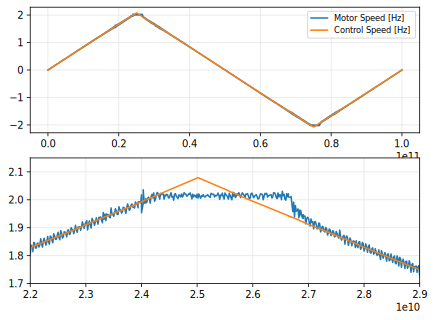

In [2]:
filename = 'test_data/2024-08-06__12-02-58_speedramp_baseline onyx topspeed_100s.csv'
df_raw = pd.read_csv(filename)

df = pd.DataFrame()
df['Motor Speed [Hz]'] = df_raw['VELOCITY']
df['Control Speed [Hz]'] = df_raw['CONTROL_VELOCITY']
df['Motor Torque [Nm]'] = df_raw['TORQUE']
df['Averaged Torque [Nm]'] = df['Motor Torque [Nm]'].rolling(window=500, center=True).mean()
df['Motor Q_current [A]'] = df_raw['Q_CURRENT']

df['Time [s]'] = pd.to_timedelta(df_raw['TIME'], unit='s')
df.set_index('Time [s]', inplace=True)  

# plot
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax[0].plot(df.index, df['Motor Speed [Hz]'], label='Motor Speed [Hz]')
ax[0].plot(df.index, df['Control Speed [Hz]'], label='Control Speed [Hz]')
ax[0].legend()

ax[1].plot(df.index, df['Motor Speed [Hz]'], label='Motor Speed [Hz]')
ax[1].plot(df.index, df['Control Speed [Hz]'], label='Control Speed [Hz]')
ax[1].set_xlim([0.22e11, 0.29e11])
ax[1].set_ylim([1.7, 2.15])




(1.7, 2.15)

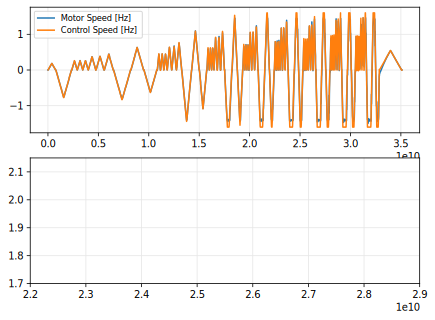

In [3]:
# filename = 'test_data/2024-08-07__12-32-23_trajectory_pendulum alu bar.csv'
filename = 'test_data/2024-08-07__15-35-35_trajectory_700gr 32v.csv'
df_raw = pd.read_csv(filename)

df = pd.DataFrame()
df['Motor Speed [Hz]'] = df_raw['VELOCITY']
df['Control Speed [Hz]'] = df_raw['CONTROL_VELOCITY']
df['Motor Torque [Nm]'] = df_raw['TORQUE']
df['Averaged Torque [Nm]'] = df['Motor Torque [Nm]'].rolling(window=500, center=True).mean()
df['Motor Q_current [A]'] = df_raw['Q_CURRENT']

df['Time [s]'] = pd.to_timedelta(df_raw['TIME'], unit='s')
df.set_index('Time [s]', inplace=True)  

# plot
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax[0].plot(df.index, df['Motor Speed [Hz]'], label='Motor Speed [Hz]')
ax[0].plot(df.index, df['Control Speed [Hz]'], label='Control Speed [Hz]')
ax[0].legend()

ax[1].plot(df.index, df['Motor Speed [Hz]'], label='Motor Speed [Hz]')
ax[1].plot(df.index, df['Control Speed [Hz]'], label='Control Speed [Hz]')
ax[1].set_xlim([0.22e11, 0.29e11])
ax[1].set_ylim([1.7, 2.15])




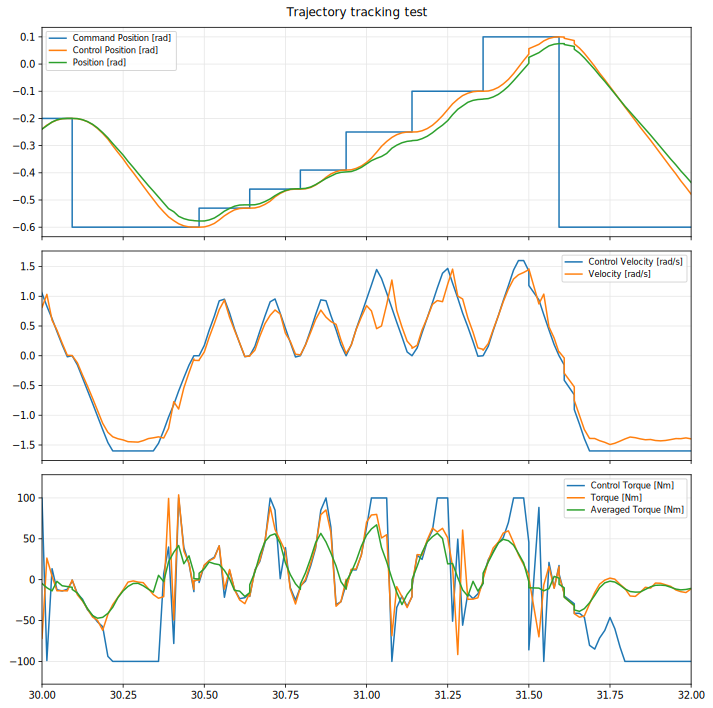

In [4]:
filename = 'test_data/2024-08-07__15-35-35_trajectory_700gr 32v.csv'
df = pd.read_csv(filename)
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df['TIME'], df['COMMAND_POSITION'], label='Command Position [rad]')
axs[0].plot(df['TIME'], df['CONTROL_POSITION'], label='Control Position [rad]')
axs[0].plot(df['TIME'], df['POSITION'], label='Position [rad]')
axs[0].legend()

# axs[1].plot(df['TIME'], df['COMMAND_VELOCITY'], label='Command Velocity [rad/s]')
axs[1].plot(df['TIME'], df['CONTROL_VELOCITY'], label='Control Velocity [rad/s]')
axs[1].plot(df['TIME'], df['VELOCITY'], label='Velocity [rad/s]')
axs[1].legend()

axs[2].plot(df['TIME'], df['CONTROL_TORQUE'], label='Control Torque [Nm]')
axs[2].plot(df['TIME'], df['TORQUE'], label='Torque [Nm]')
averaged_torque = df['TORQUE'].rolling(window=5, center=True).mean()
axs[2].plot(df['TIME'], averaged_torque, label='Averaged Torque [Nm]')
axs[2].legend()

# axs[3].plot(df['TIME'], df['Q_CURRENT'], label='Q Current [A]')
# axs[3].legend()

axs[0].set_xlim([30, 32])

fig.suptitle('Trajectory tracking test')
fig.tight_layout()

plt.show()


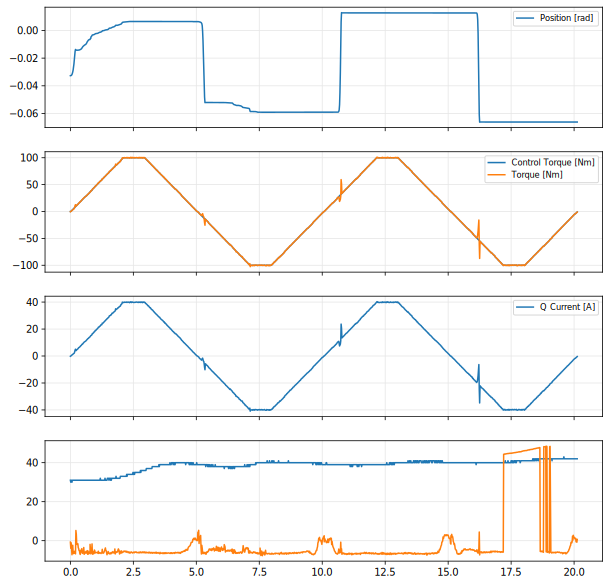

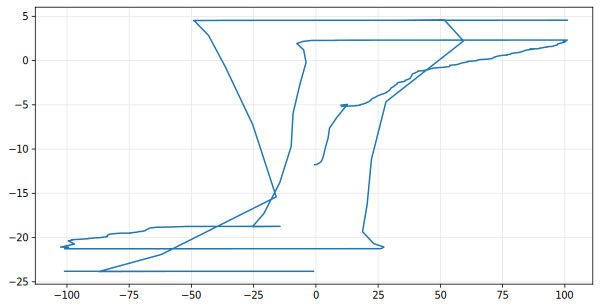

In [5]:
# filename = 'test_data/2024-08-07__16-47-33__torqueramp__80nm.csv' # incorrect position control
# filename = 'test_data/2024-08-07__17-02-46__torqueramp__mlml.csv'   #last test before failure

# filename='test_data/2024-08-08__12-33-45__torqueramp__60.csv'   #onyx pinwheel but disk replaced with pccf, at 32v
filename = 'test_data/2024-08-08__13-19-03__torqueramp__120.csv'

df = pd.read_csv(filename)

df['MOTOR_TEMPERATURE'] = df['MOTOR_TEMPERATURE'] * 0.442 - 1.62

# STORED_DATA = [ 'POSITION', 'TORQUE', 'CONTROL_TORQUE', 'Q_CURRENT',
#                 'FAULT', 'TRAJECTORY_COMPLETE',
#                 'TEMPERATURE', 'MOTOR_TEMPERATURE',
# ]
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df['TIME'], df['POSITION'], label='Position [rad]')
axs[0].legend()

axs[1].plot(df['TIME'], df['CONTROL_TORQUE'], label='Control Torque [Nm]')
axs[1].plot(df['TIME'], df['TORQUE'], label='Torque [Nm]')
axs[1].legend()

axs[2].plot(df['TIME'], df['Q_CURRENT'], label='Q Current [A]')
axs[2].legend()

axs[3].plot(df['TIME'], df['TEMPERATURE'], label='Temperature [°C]')
axs[3].plot(df['TIME'], df['MOTOR_TEMPERATURE'], label='Motor Temperature [°C]')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(df['TORQUE'], df['POSITION']*360)



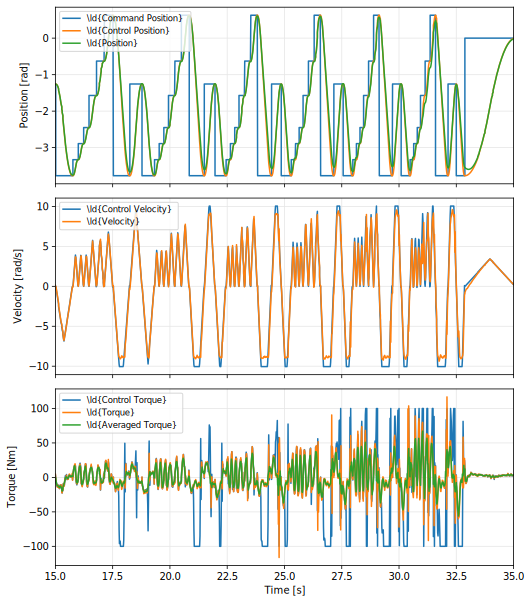

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setup latex style for plots exported to svg
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


plt.rc('legend', fontsize=8.5)
plt.rc('grid', color='0.9')
plt.rcParams['axes.grid'] = True

rev_to_rad = 2 * np.pi

filename = 'test_data/2024-08-07__15-35-35_trajectory_700gr 32v.csv'
df = pd.read_csv(filename)
fig, axs = plt.subplots(3, 1, figsize=(7.5, 8.5), sharex=True)

axs[0].plot(df['TIME'], df['COMMAND_POSITION']*rev_to_rad, label='\\ld{Command Position}')
axs[0].plot(df['TIME'], df['CONTROL_POSITION']*rev_to_rad, label='\\ld{Control Position}')
axs[0].plot(df['TIME'], df['POSITION']*rev_to_rad, label='\\ld{Position}')
axs[0].set_ylabel('Position [rad]')
axs[0].legend(loc='upper left')

# axs[1].plot(df['TIME'], df['COMMAND_VELOCITY'], label='\\ld{Command Velocity [rad/s]}')
axs[1].plot(df['TIME'], df['CONTROL_VELOCITY']*rev_to_rad, label='\\ld{Control Velocity}')
axs[1].plot(df['TIME'], df['VELOCITY']*rev_to_rad, label='\\ld{Velocity}')
axs[1].set_ylabel('Velocity [rad/s]')
axs[1].legend(loc='upper left')

axs[2].plot(df['TIME'], df['CONTROL_TORQUE'], label='\\ld{Control Torque}')
axs[2].plot(df['TIME'], df['TORQUE'], label='\\ld{Torque}')
averaged_torque = df['TORQUE'].rolling(window=5, center=True).mean()
axs[2].plot(df['TIME'], averaged_torque, label='\\ld{Averaged Torque}')
axs[2].set_ylabel('Torque [Nm]')
axs[2].legend(loc='upper left')

# axs[3].plot(df['TIME'], df['Q_CURRENT'], label='\\ld{Q Current [A]}')
# axs[3].legend()

axs[0].set_xlim([15, 35])
axs[2].set_xlabel('Time [s]')

# fig.suptitle('Trajectory tracking test')
fig.tight_layout()

plt.savefig('figures/trajectory_700gr_32v.svg')

plt.show()

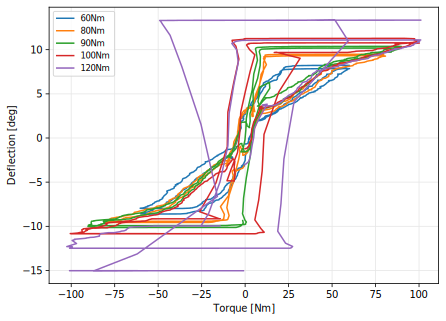

In [7]:
filenames = {
    '60Nm': 'test_data/2024-08-08__12-33-45__torqueramp__60.csv',
    '80Nm': 'test_data/2024-08-08__13-10-25__torqueramp__80nm.csv',
    '90Nm': 'test_data/2024-08-08__13-11-58__torqueramp__90.csv',
    '100Nm': 'test_data/2024-08-08__13-14-22__torqueramp__100.csv',
    '120Nm': 'test_data/2024-08-08__13-19-03__torqueramp__120.csv',    
}
test_dfs = {}
for name, filename in filenames.items():
    df = pd.read_csv(filename)
    df['MOTOR_TEMPERATURE'] = df['MOTOR_TEMPERATURE'] * 0.442 - 1.62
    df['DEFLECTION'] = (df['POSITION'] - df['POSITION'].mean()) * 360
    test_dfs[name] = df

fig, axs = plt.subplots(1, 1, figsize=(7, 5))
for name, df in test_dfs.items():
    axs.plot(df['TORQUE'], df['DEFLECTION'], label=name)
axs.legend()
axs.set_xlabel('Torque [Nm]')
axs.set_ylabel('Deflection [deg]')

plt.show()